In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
filename = '091_W_Aya_10K.obj'
vertices = []
vertex_norm = []
vertex_tex = []
triangles = []
texcoords = []
for line in open(filename, "r"):
    values = line.split()
    if(values==[]):
        continue
    if(values=='#'):
        continue
    if(values[0]=='v'):
        vertices.append([float(values[1]),float(values[2]),float(values[3])])
    if(values[0]=='vn'):
        vertex_norm.append([float(values[1]),float(values[2]),float(values[3])])
    if(values[0]=='vt'):
        vertex_tex.append([float(values[1]),float(values[2]),float(values[3])])
    if(values[0]=='f'):
        face=[]
        texcoord = []
        norm = []
        for v in values[1:]:
            w = v.split('/')
            face.append(int(w[0]))
            if(len(w)>=2 and len(w[1])>0):
                texcoord.append(int(w[1]))
            else:
                texcoord.append(-1)
            if(len(w)>=3 and len(w[2])>0):
                norm.append(int(w[2]))
            else:
                norm.append(-1)
        triangles.append(face)
        texcoords.append(texcoord)

In [3]:
vertices = np.array(vertices,np.int32)
vertices = vertices-np.min(vertices)
vertices[...,1] = np.max(vertices[...,1]) - vertices[...,1]
triangles = np.array(triangles,np.int)-1
texcoords=np.array(texcoords,np.int)-1
vertex_tex = np.array(vertex_tex,np.float32)

In [5]:
uv_map = plt.imread("./tex/091_W_Aya_2K_01.jpg")
uv_map = uv_map.astype('float32')
uv_map = np.rot90(uv_map,3)

(-0.5, 2047.5, 2047.5, -0.5)

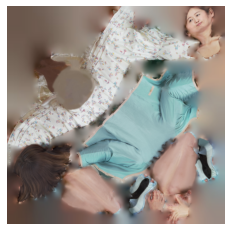

In [6]:
plt.imshow(uv_map/255.0)
plt.axis('off')

(-0.5, 421.5, 1316.5, -0.5)

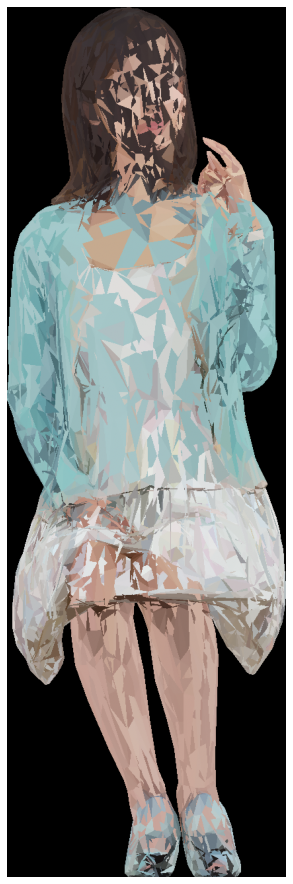

In [9]:
img_3D = np.zeros((np.max(vertices[...,1]),np.max(vertices[...,0]),3),dtype=np.uint8)
for i in range(triangles.shape[0]):
    cnt = np.array([(vertices[triangles[i,0],0],vertices[triangles[i,0],1]),
                    (vertices[triangles[i,1],0],vertices[triangles[i,1],1]),
                    (vertices[triangles[i,2],0],vertices[triangles[i,2],1])],dtype=np.int32)
    color_coord1_x = int(vertex_tex[texcoords[i,0],0] * uv_map.shape[0])
    color_coord1_y = int(vertex_tex[texcoords[i,0],1] * uv_map.shape[1])
    color_coord2_x = int(vertex_tex[texcoords[i,1],0] * uv_map.shape[0])
    color_coord2_y = int(vertex_tex[texcoords[i,1],1] * uv_map.shape[1])
    color_coord3_x = int(vertex_tex[texcoords[i,2],0] * uv_map.shape[0])
    color_coord3_y = int(vertex_tex[texcoords[i,2],1] * uv_map.shape[1])
    color = (uv_map[color_coord1_x,color_coord1_y,...]+
             uv_map[color_coord2_x,color_coord2_y,...]+
             uv_map[color_coord3_x,color_coord3_y,...])/3.0
    img_3D = cv2.drawContours(img_3D,[cnt],0,(int(color[0]),int(color[1]),int(color[2])),-1)
plt.figure(figsize=(16,16))
plt.imshow(img_3D/255.0)
plt.axis('off')